In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm

In [75]:
data= pd.read_csv(r'C:\Users\alexa\OneDrive\Documents\Python Scripts\Big Mac Analysis\Big Mac Data.csv')
data.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,7/1/2011,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,7/1/2011,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,7/1/2011,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,7/1/2011,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,7/1/2011,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [76]:
data=data.drop(['USD', 'EUR', 'GBP','JPY','CNY','dollar_ex','adj_price'],axis=1)

In [77]:
data.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_price,GDP_dollar
0,7/1/2011,ARG,ARS,Argentina,20.00,4.839685,9138.177
1,7/1/2011,AUS,AUD,Australia,4.56,4.943724,55589.549
2,7/1/2011,BRA,BRL,Brazil,9.50,6.162429,10816.487
3,7/1/2011,GBR,GBP,Britain,2.39,3.891637,36119.846
4,7/1/2011,CAN,CAD,Canada,4.73,5.000793,46214.914


In [78]:
data.tail()

,date,iso_a3,currency_code,name,local_price,dollar_price,GDP_dollar
807,7/1/2021,UKR,UAH,Ukraine,65.00,2.387950,3653.11
808,7/1/2021,ARE,AED,United Arab Emirates,14.75,4.015627,31982.23
809,7/1/2021,USA,USD,United States,5.65,5.650000,63415.99
810,7/1/2021,URY,UYU,Uruguay,225.00,5.113636,15777.96
811,7/1/2021,VNM,VND,Vietnam,69000.00,2.996287,3498.98


In [79]:
datad = data.describe()

## Simple Linear Regression of Big Mac Prices(in USD) on GDP(in USD)
Although simplistic, I am seeing the relationship between GDP per capita and its effect on Big Mac Prcies.
This can be victim to underfitting, which means that the model is too simplistic and cannot capture all the dependencies among the data. This typically means all dependencies will be described by GDP per capita although not very accurate. Regardless, this is a good exercise to practice simple linear regression.

In [80]:
import numpy as np 
from sklearn.linear_model import LinearRegression 

In [81]:
x = data["GDP_dollar"]
y = data["dollar_price"]

In [82]:
x = x.to_numpy().reshape((-1,1))
y= y.to_numpy()
x

array([[  9138.177  ],
       [ 55589.549  ],
       [ 10816.487  ],
       [ 36119.846  ],
       [ 46214.914  ],
       [ 11827.958  ],
       [  4382.136  ],
       [  6273.372  ],
       [ 18288.284  ],
       [ 56147.143  ],
       [  2788.829  ],
       [ 36947.     ],
       [ 31590.681  ],
       [ 12879.296  ],
       [  1264.839  ],
       [  3015.374  ],
       [ 28685.616  ],
       [ 42820.392  ],
       [  8423.176  ],
       [  9565.962  ],
       [ 32145.233  ],
       [ 84443.634  ],
       [  1049.749  ],
       [  5171.651  ],
       [  2007.362  ],
       [ 12300.126  ],
       [ 10437.49   ],
       [ 16995.78   ],
       [ 43116.689  ],
       [  7157.801  ],
       [ 20590.962  ],
       [ 48874.608  ],
       [ 67245.997  ],
       [ 18457.752  ],
       [  4991.525  ],
       [ 10398.685  ],
       [ 47283.633  ],
       [  9138.177  ],
       [ 55589.549  ],
       [ 10816.487  ],
       [ 36119.846  ],
       [ 46214.914  ],
       [ 11827.958  ],
       [  4

In [83]:
model = LinearRegression()

In [84]:
model.fit(x,y)

LinearRegression()

In [85]:
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5768393675909054


In [86]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 2.6041716346254793
Slope: [4.14486403e-05]


In [87]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[2.98293665 4.90828286 3.05250031 4.10129014 4.51971698 3.09442441
 2.78580521 2.86419437 3.36219614 4.93139437 2.7197648  4.13557455
 3.91356241 3.13800094 2.65659749 2.72915479 3.79315141 4.37901866
 2.95330083 3.00066775 3.93654783 6.10424545 2.6476823  2.81852954
 2.68737406 3.11399513 3.0367914  3.30862361 4.39129977 2.90085275
 3.45763901 4.62995768 5.39142678 3.36922036 2.81106356 3.03518299
 4.56401393 2.98293665 4.90828286 3.05250031 4.10129014 4.51971698
 3.09442441 2.78580521 2.86419437 3.36219614 4.93139437 2.7197648
 4.13557455 3.91356241 3.13800094 2.65659749 2.72915479 3.79315141
 4.37901866 2.95330083 3.00066775 3.93654783 6.10424545 2.6476823
 2.81852954 2.68737406 3.11399513 3.0367914  3.30862361 4.39129977
 2.90085275 3.45763901 4.62995768 5.39142678 3.36922036 2.81106356
 3.03518299 4.56401393 2.98293665 4.90828286 3.05250031 4.10129014
 4.51971698 3.09442441 2.78580521 2.86419437 3.36219614 4.93139437
 2.7197648  4.13557455 3.91356241 3.13800094

In [88]:
B1 = model.coef_*100
B1

array([0.00414486])

## Results
With a marginal increase in GDP per capita, there is a 0.004% increase in the price of big macs. This seems small, but since GDP per Capita is a lot larger than big mac prices, it is significant. For example, if we instead conducted this in thousands of GDP per capita, we would see a 4 percent increase in big mac prices.

In [89]:
x = x/1000
y
model.fit(x,y)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 2.6041716346254797
Slope: [0.04144864]


## Plot of the Regression 

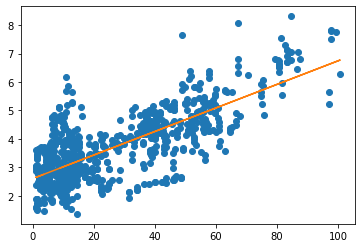

In [97]:
plt.plot(x,y, "o")

plt.plot(x,model.coef_*x+model.intercept_)